In [8]:
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from eofs.xarray import Eof

import utils

wave: amplitude=1, period=15
wave: amplitude=1.5, period=25


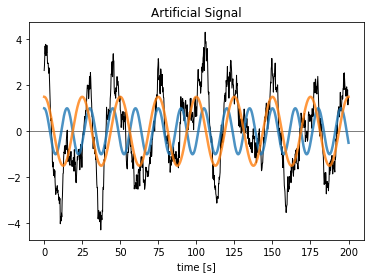

In [43]:
amp = (1,1.5)
period = (15,25)

signal_grid, signal = utils.create_signal(
    amplitude_and_period=[(amp[0], period[0]), (amp[1], period[1])],
    white_noise_amplitude=.1,
    red_noise_amplitude_and_r1=(1, 0.95),
)

In [45]:
n = len(signal)
dx = signal_grid[1]-signal_grid[0]
freqs = np.fft.rfftfreq (n, dx)
signal_fft = np.fft.rfft (signal)        
signal_power = np.abs(signal_fft)**2
T = 1/freqs

signal_max = np.zeros(len(signal_power))
signal_max[np.argmax(signal_power)] = np.max(signal_power)
print('First Maximum at frequency: ' + str(np.argmax(signal_power)))
signal_fft_max_rm = signal_power - signal_max
print('Second Maximum at frequency: ' + str(np.argmax(signal_fft_max_rm)))

First Maximum at frequency: 8
Second Maximum at frequency: 13


C:\Users\maxse\AppData\Local\Temp/ipykernel_3032/1111657021.py:6: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/freqs


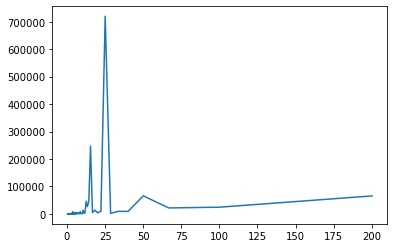

In [46]:
plt.plot(T,signal_power)
#plt.xscale('log')
plt.show()

**Import QBO Data and compute Principal Components**

In [47]:
# load data
qbo_raw = utils.get_qbo()

# deseasonalize
qbo_anom = qbo_raw.groupby("time.dayofyear") - qbo_raw.groupby("time.dayofyear").mean()
qbo = qbo_anom.drop("dayofyear")

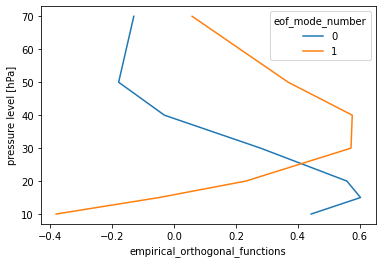

In [48]:
solver = Eof(qbo.T)

eofs = solver.eofs(neofs=2)

eofs.plot(hue="mode", y="p")
plt.show()

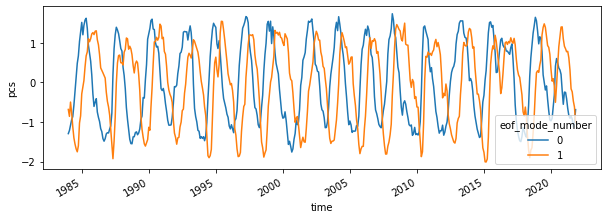

In [49]:
pcs = solver.pcs(npcs=2, pcscaling=1)

pcs.isel(mode=range(2)).plot(hue="mode", figsize=(10, 3))
plt.show()

In [68]:
n_qbo = len(pcs.time)
dx_qbo = pcs.time.isel(1)-pcs.time.isel(0) ???
freqs_qbo = np.fft.rfftfreq (n_qbo, dx_qbo)
signal_fft_qbo = np.fft.rfft (pcs.sel(mode=0))        
signal_power_qbo = np.abs(signal_fft_qbo)**2
T_qbo = 1/freqs_qbo

print('First Maximum at frequency: ' + str(np.argmax(signal_power_qbo)))

ValueError: the first argument to .isel must be a dictionary

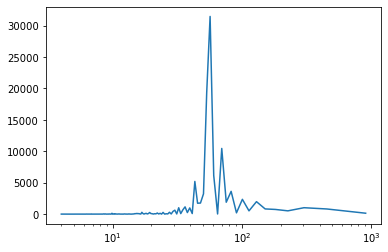

In [65]:
plt.plot(T_qbo, signal_power_qbo)
plt.xscale('log')
plt.show()